# Demonstration: QCNN algorithm

In [1]:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars

import sys
sys.path.insert(0, '../')
import vqe as vqe
import qcnn as qcnn
import losses as losses
import visualization as qplt
##############

+--- CIRCUIT ---+
0: ──||──||──RX(0.00)──RY(8.00)──╭C──RX(16.00)──H──RX(24.00)──RY(32.00)──────────────────────
1: ──||──||──RX(1.00)──RY(9.00)──╰X────────────╭C──RX(20.00)──H──────────RX(25.00)──RY(33.00)
2: ──||──||──RX(2.00)──RY(10.00)─╭C──RX(17.00)─╰X──H──────────RX(26.00)──RY(34.00)───────────
3: ──||──||──RX(3.00)──RY(11.00)─╰X────────────╭C──RX(21.00)──H──────────RX(27.00)──RY(35.00)
4: ──||──||──RX(4.00)──RY(12.00)─╭C──RX(18.00)─╰X──H──────────RX(28.00)──RY(36.00)───────────
5: ──||──||──RX(5.00)──RY(13.00)─╰X────────────╭C──RX(22.00)──H──────────RX(29.00)──RY(37.00)
6: ──||──||──RX(6.00)──RY(14.00)─╭C──RX(19.00)─╰X──H──────────RX(30.00)──RY(38.00)─╭C────────
7: ──||──||──RX(7.00)──RY(15.00)─╰X──RX(23.00)──H──RX(31.00)──RY(39.00)────────────╰X────────

──╭C──────────RX(40.00)────────────────────────||─╭C─────────────────────────
──╰X────────────────────╭C──────────RX(44.00)──||─╰ControlledOperation(48.00)
──╭C──────────RX(41.00)─╰X─────────────────────||─╭C─────────────────────

Cost: 0.2080271691083908: 100%|███████████| 10000/10000 [01:41<00:00, 98.53it/s]


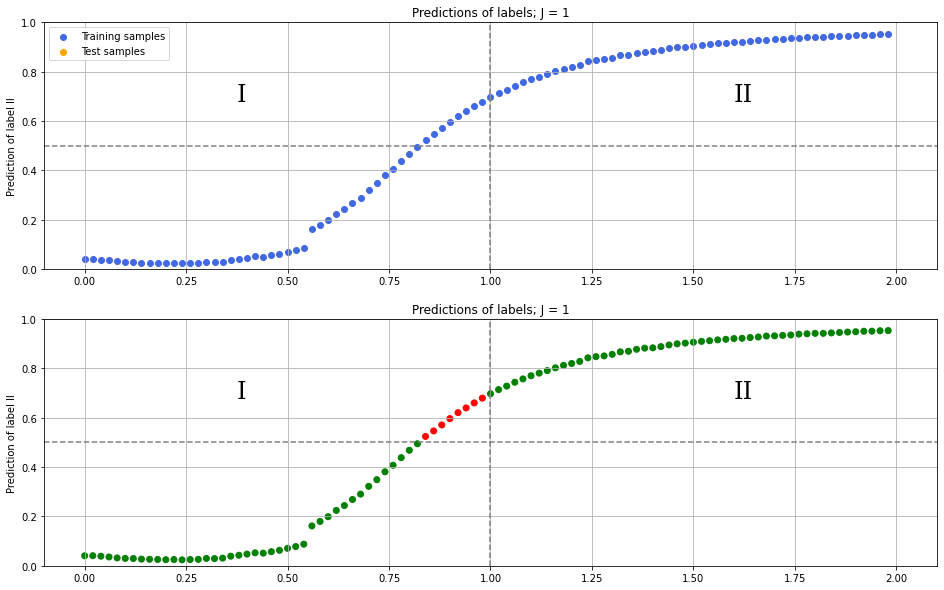

In [2]:
myqcnn = qcnn.qcnn(vqe.load_vqe('../data/vqe_isingchain.pkl'), qcnn.qcnn_circuit)
train_index = np.random.choice(np.arange(len(myqcnn.vqe_params)), 100, replace = False)
myqcnn.train(1, 10000, train_index, losses.cross_entropy, circuit=True, plot=False, inject = False)
qplt.show_QCNN_classification1D(myqcnn, inject = False)

+--- CIRCUIT ---+
0: ──||──||──RX(0.00)──RY(8.00)──╭C──RX(16.00)────────────────||─╭C─────────────────────────
1: ──||──||──RX(1.00)──RY(9.00)──╰X────────────╭C──RX(20.00)──||─╰ControlledOperation(24.00)
2: ──||──||──RX(2.00)──RY(10.00)─╭C──RX(17.00)─╰X─────────────||─╭C─────────────────────────
3: ──||──||──RX(3.00)──RY(11.00)─╰X────────────╭C──RX(21.00)──||─╰ControlledOperation(26.00)
4: ──||──||──RX(4.00)──RY(12.00)─╭C──RX(18.00)─╰X─────────────||─╭C─────────────────────────
5: ──||──||──RX(5.00)──RY(13.00)─╰X────────────╭C──RX(22.00)──||─╰ControlledOperation(28.00)
6: ──||──||──RX(6.00)──RY(14.00)─╭C──RX(19.00)─╰X─────────────||─╭C─────────────────────────
7: ──||──||──RX(7.00)──RY(15.00)─╰X──RX(23.00)────────────────||─╰ControlledOperation(30.00)

──╭C───────────────────────────||────────────────────────────────────────────────────||
──╰ControlledOperation(25.00)──||──RX(32.00)──RY(36.00)─╭C──RX(40.00)────────────────||
──╭C───────────────────────────||───────────────────────│────

Cost: 0.22132952511310577: 100%|████████████| 1000/1000 [00:15<00:00, 65.13it/s]


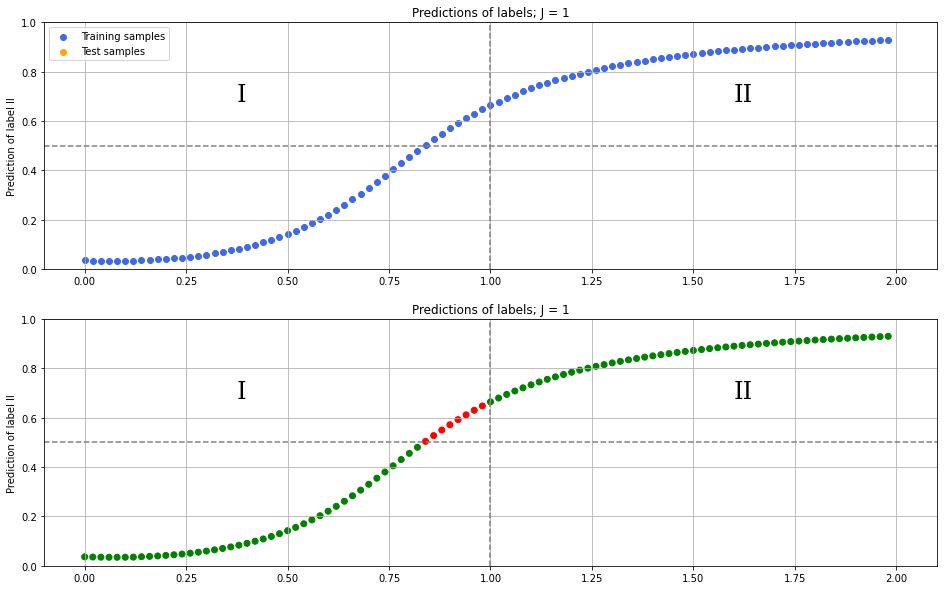

In [31]:
myqcnn = qcnn.qcnn(vqe.load_vqe('../data/vqe_isingchain.pkl'), qcnn.qcnn_circuit)
train_index = np.random.choice(np.arange(len(myqcnn.vqe_params)), 100, replace = False)
myqcnn.train(.3, 1000, train_index, losses.cross_entropy, circuit=True, plot=False, inject = False)
show_QCNN_classification1D(myqcnn, inject = True)